In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# Read in data
df_2020 = pd.read_csv('../data/img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv')
df_2021 = pd.read_csv('../data/img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv')
df_2022 = pd.read_csv('../data/img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv')

dfs = [df_2020,df_2021, df_2022]

In [3]:
for d in dfs:
    d['GDM_sev'] = 'low'
    d.loc[d['DM_severity'] > 10, 'GDM_sev'] = 'high'
    d['GDM_inc'] = 'low'
    d.loc[d['DM_inc'] > 25, 'GDM_inc'] = 'high'

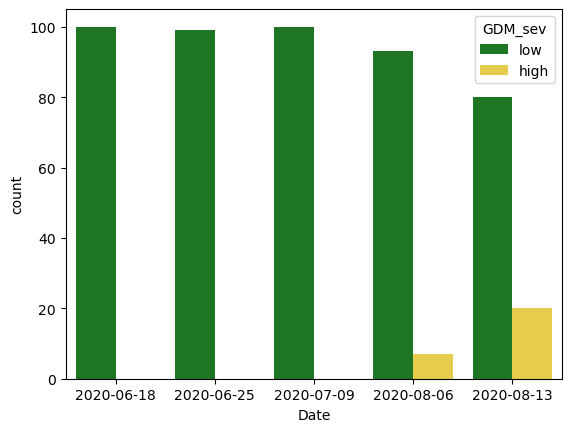

In [21]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2020, x="Date", hue="GDM_sev")

# plt.savefig("ICPP_sevcount_20.svg")
plt.show()

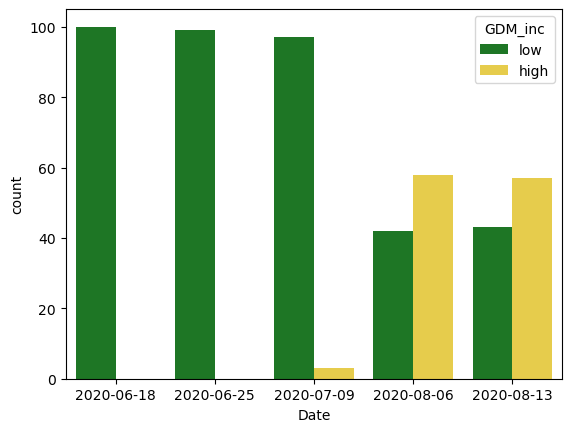

In [23]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2020, x="Date", hue="GDM_inc")
# plt.savefig("ICPP_inccount_20.svg")
plt.show()

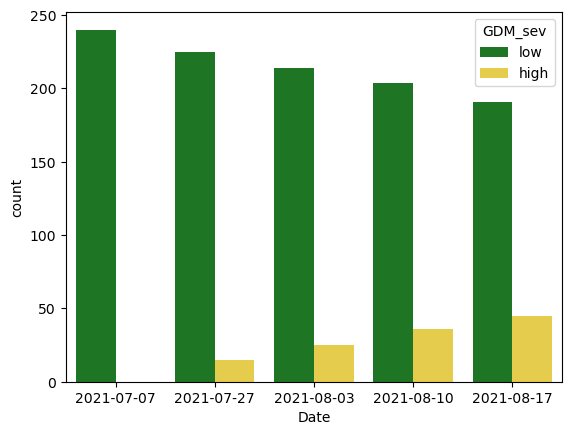

In [19]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2021, x="Date", hue="GDM_sev")

# plt.savefig("ICPP_sevcount_21.svg")
plt.show()

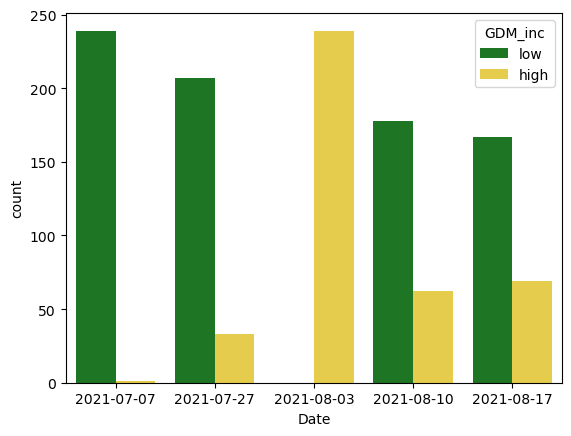

In [24]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2021, x="Date", hue="GDM_inc")

# plt.savefig("ICPP_inccount_21.svg")
plt.show()

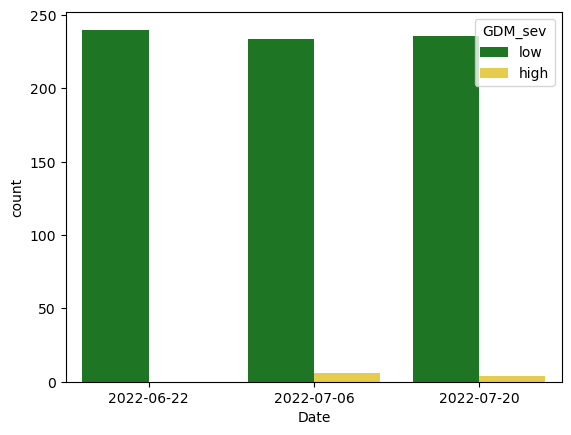

In [17]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2022, x="Date", hue="GDM_sev")

# plt.savefig("ICPP_sevcount_22.svg")
plt.show()

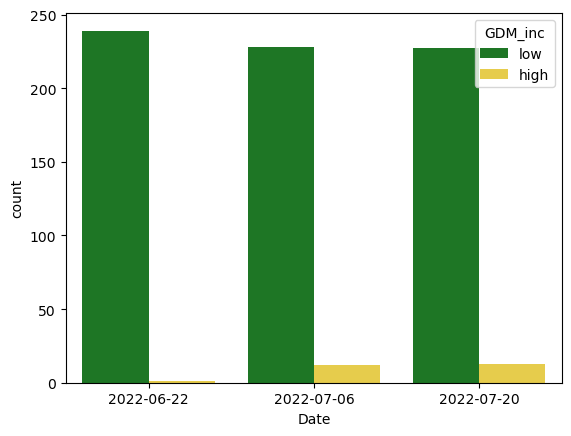

In [22]:
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.countplot(data=df_2022, x="Date", hue="GDM_inc")

#plt.savefig("ICPP_inccount_22.svg")
plt.show()

In [4]:
master_df = pd.concat(dfs)

In [5]:
master_df.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'GDM_sev', 'GDM_inc'],
      dtype='object')

In [6]:
low_dis = master_df[master_df['GDM_sev']=='low']
len(low_dis)

2256

In [7]:
high_dis = master_df[master_df['GDM_sev']=='high']
len(high_dis)

158

Low disease: 2256
High disease: 158
Proportion: 14.28 : 1


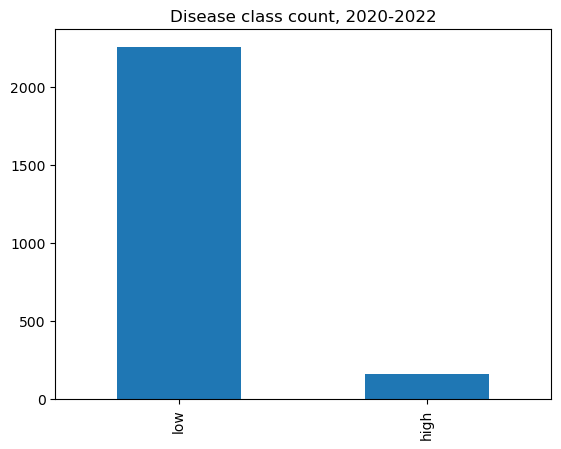

In [8]:
# Visualize data imbalance

target_count = master_df.GDM_sev.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Disease class count, 2020-2022');

Low disease: 1074
High disease: 121
Proportion: 8.88 : 1


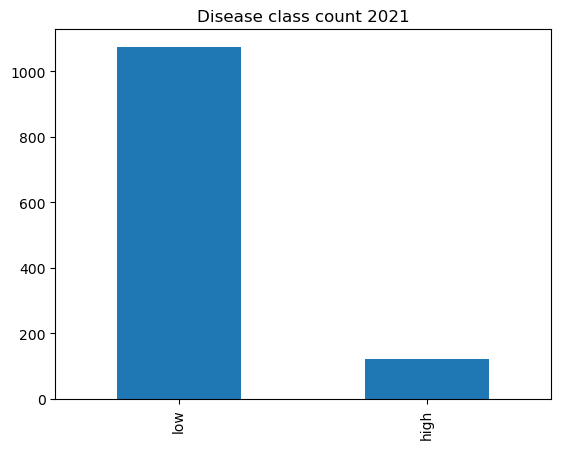

In [9]:
# For each year
target_count = dfs[1].GDM_sev.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    
target_count.plot(kind='bar', title='Disease class count 2021');

In [10]:
# Plot high vs low counts per day all years

# colors = ["#0F8518", "#FFFFFF"]
# sns.set_palette(colors)
# sns.boxplot(data=dfs[0], x='Date', y='arvi', hue='disease_class',showfliers=False)
# plt.ylabel('ARVI')
# plt.legend(title='Disease Severity')

In [11]:
master_df.columns


Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'GDM_sev', 'GDM_inc'],
      dtype='object')

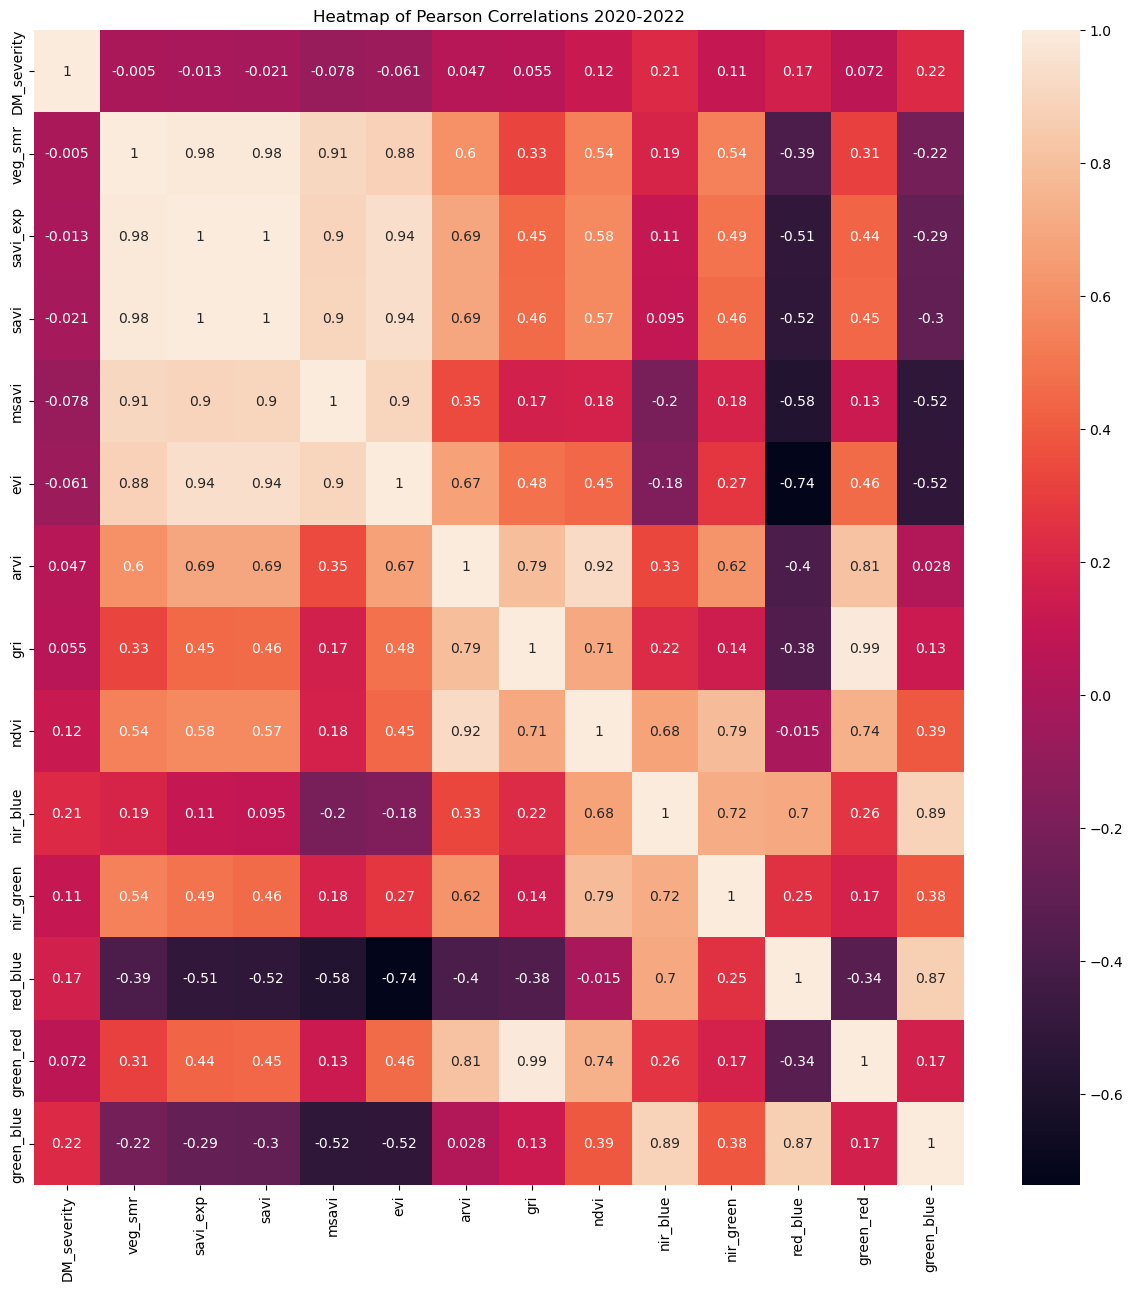

In [12]:
# Heatmap to determine which VIs to show

cols = ['DM_severity', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue']
filtered = master_df[cols]
correlations = filtered.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Pearson Correlations 2020-2022');
plt.show()

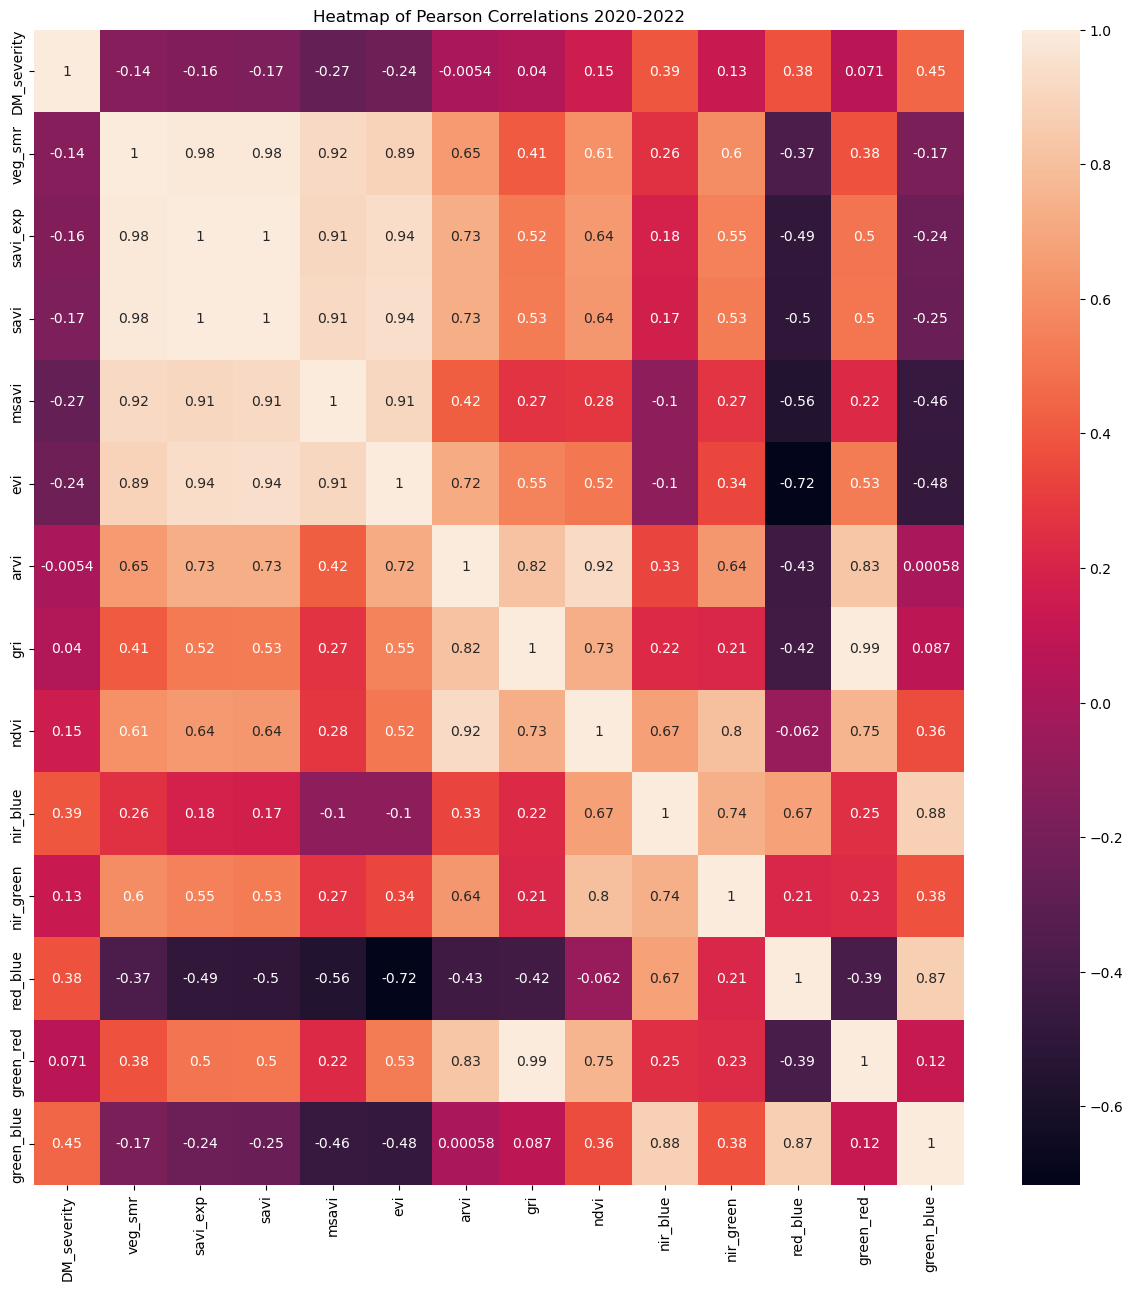

In [13]:
# Try with just DM block

just_dm = master_df[master_df['Block']=='DM']

cols = ['DM_severity', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue']
filtered = just_dm[cols]
correlations = filtered.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Pearson Correlations 2020-2022');
plt.show()

In [14]:
print('GDM Severity:\n')

print('High disease EVI:', master_df[master_df['GDM_sev']=='high'].evi.mean())
print('Low disease EVI:', master_df[master_df['GDM_sev']=='low'].evi.mean())

print('Low disease MSAVI:', master_df[master_df['GDM_sev']=='low'].msavi.mean())
print('High disease MSAVI:', master_df[master_df['GDM_sev']=='high'].msavi.mean())

print('Low disease SAVI:', master_df[master_df['GDM_sev']=='low'].savi.mean())
print('High disease SAVI:', master_df[master_df['GDM_sev']=='high'].savi.mean())

print('Low disease ARVI:', master_df[master_df['GDM_sev']=='low'].arvi.mean())
print('High disease ARVI:', master_df[master_df['GDM_sev']=='high'].arvi.mean())

print('Low disease SAVI_exp:', master_df[master_df['GDM_sev']=='low'].savi_exp.mean())
print('High disease SAVI_exp:', master_df[master_df['GDM_sev']=='high'].savi_exp.mean())



GDM Severity:

High disease EVI: 0.44492799481883494
Low disease EVI: 0.4654471262111625
Low disease MSAVI: 0.2746216079431309
High disease MSAVI: 0.24721129991688126
Low disease SAVI: 0.44307583637916276
High disease SAVI: 0.439019556605374
Low disease ARVI: 0.6076099609276295
High disease ARVI: 0.6278553213354074
Low disease SAVI_exp: 0.4697096337101721
High disease SAVI_exp: 0.4657057236569227


In [15]:
print('GDM Incidence:\n')

print('High disease EVI:', master_df[master_df['GDM_inc']=='high'].evi.mean())
print('Low disease EVI:', master_df[master_df['GDM_inc']=='low'].evi.mean())

print('Low disease MSAVI:', master_df[master_df['GDM_inc']=='low'].msavi.mean())
print('High disease MSAVI:', master_df[master_df['GDM_inc']=='high'].msavi.mean())

print('Low disease SAVI:', master_df[master_df['GDM_inc']=='low'].savi.mean())
print('High disease SAVI:', master_df[master_df['GDM_inc']=='high'].savi.mean())

print('Low disease ARVI:', master_df[master_df['GDM_inc']=='low'].arvi.mean())
print('High disease ARVI:', master_df[master_df['GDM_inc']=='high'].arvi.mean())

print('Low disease SAVI_exp:', master_df[master_df['GDM_inc']=='low'].savi_exp.mean())
print('High disease SAVI_exp:', master_df[master_df['GDM_inc']=='high'].savi_exp.mean())



GDM Incidence:

High disease EVI: 0.4508625177557966
Low disease EVI: 0.467992861834717
Low disease MSAVI: 0.281309836696289
High disease MSAVI: 0.24394448472864103
Low disease SAVI: 0.4436659976954841
High disease SAVI: 0.4398967611592463
Low disease ARVI: 0.594259325040939
High disease ARVI: 0.6589075038272528
Low disease SAVI_exp: 0.4694712078306945
High disease SAVI_exp: 0.46936708791216464


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2264/1738498969.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


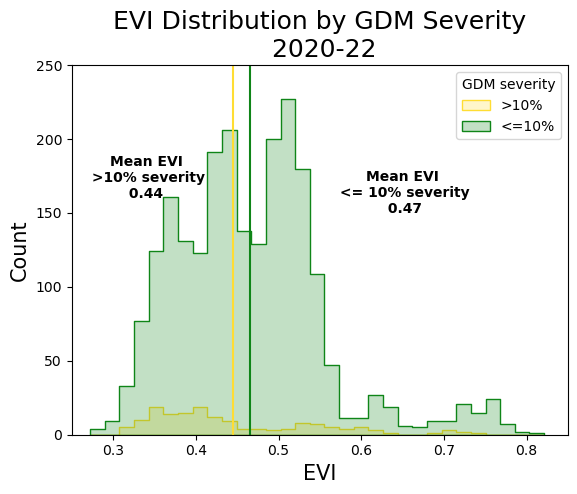

In [16]:
# Plot distributions for 2020-2022 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=master_df, x="evi", hue="GDM_sev", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=master_df[master_df['GDM_sev']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 160, "Mean EVI\n >10% severity\n 0.44 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=master_df[master_df['GDM_sev']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.65, 150, "Mean EVI\n <= 10% severity\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Severity\n 2020-22', fontsize=18)
# plt.savefig("fig2_sev_20_22.svg")
plt.show()

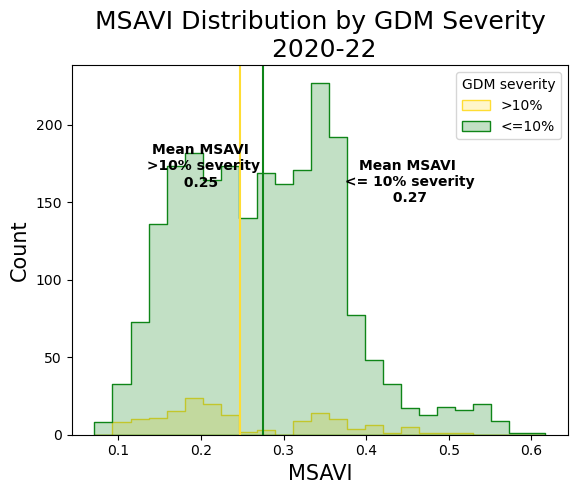

In [17]:
# Plot distributions for 2020-2022 severity
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=master_df, x="msavi", hue="GDM_sev", element='step')

plt.xlabel('MSAVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
# plt.xlim(0.25, 0.85)
# plt.ylim(0, 220,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=master_df[master_df['GDM_sev']=='high'].msavi.mean(),
            color="#FFDD33")
plt.text(0.20, 160, "Mean MSAVI\n >10% severity\n 0.25 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=master_df[master_df['GDM_sev']=='low'].msavi.mean(),
            color="#0F8518")

plt.text(0.45, 150, "Mean MSAVI\n <= 10% severity\n 0.27", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('MSAVI Distribution by GDM Severity\n 2020-22', fontsize=18)
#plt.savefig("fig2_sev_20_22.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2264/3434891431.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


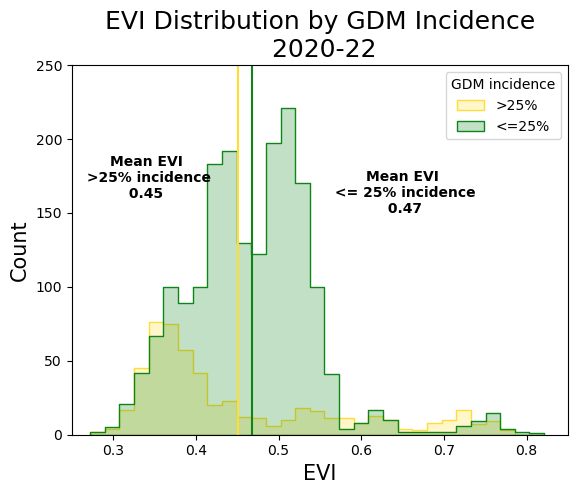

In [18]:
# Plot distributions for 2020-2022
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=master_df, x="evi", hue="GDM_inc", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=master_df[master_df['GDM_inc']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=master_df[master_df['GDM_inc']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence\n 2020-22', fontsize=18)
# plt.savefig("fig2_inc_20_22.svg")
plt.show()

In [19]:
# Use Mann-whitney U test to check if differences are significant
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)

In [20]:
# all years
low_sev_all = master_df[master_df['GDM_sev']=='low']
high_sev_all = master_df[master_df['GDM_sev']=='high']

low_inc_all = master_df[master_df['GDM_inc']=='low']
high_inc_all = master_df[master_df['GDM_inc']=='high']

# 2020
low_sev_20 = df_2020[df_2020['GDM_sev']=='low']
high_sev_20 = df_2020[df_2020['GDM_sev']=='high']

low_inc_20 = df_2020[df_2020['GDM_inc']=='low']
high_inc_20 = df_2020[df_2020['GDM_inc']=='high']

# 2021
low_sev_21 = df_2021[df_2021['GDM_sev']=='low']
high_sev_21 = df_2021[df_2021['GDM_sev']=='high']

low_inc_21 = df_2021[df_2021['GDM_inc']=='low']
high_inc_21 = df_2021[df_2021['GDM_inc']=='high']

#2022
low_sev_22 = df_2022[df_2022['GDM_sev']=='low']
high_sev_22 = df_2022[df_2022['GDM_sev']=='high']

low_inc_22 = df_2022[df_2022['GDM_inc']=='low']
high_inc_22 = df_2022[df_2022['GDM_inc']=='high']

In [21]:
# define distributions (EVI, all years)
evi_lowsev_all = low_sev_all['evi']
evi_highsev_all = high_sev_all['evi']

evi_lowinc_all = low_inc_all['evi']
evi_highinc_all = high_inc_all['evi']

print( 'Low sev vs. high sev all years:\n')
mann_whitney_u_test(evi_lowsev_all,evi_highsev_all)

print( '\nLow inc vs. high inc all years:\n')
mann_whitney_u_test(evi_lowinc_all,evi_highinc_all)

Low sev vs. high sev all years:

Mann-Whitney U: 209123.0 p-value: 0.0002641468465235248

Low inc vs. high inc all years:

Mann-Whitney U: 636715.5 p-value: 2.2577521911545774e-18


In [22]:
# define distributions (EVI, 2020)
evi_lowsev_20 = low_sev_20['evi']
evi_highsev_20 = high_sev_20['evi']

evi_lowinc_20 = low_inc_20['evi']
evi_highinc_20 = high_inc_20['evi']

print( 'Low sev vs. high sev 2020:\n')
mann_whitney_u_test(evi_lowsev_20,evi_highsev_20)

print( '\nLow inc vs. high inc 20:\n')
mann_whitney_u_test(evi_lowinc_20,evi_highinc_20)

Low sev vs. high sev 2020:

Mann-Whitney U: 3546.0 p-value: 0.00010554885304206591

Low inc vs. high inc 20:

Mann-Whitney U: 6544.5 p-value: 2.5206614510950456e-31


In [23]:
print('High disease EVI 2020:', df_2020[df_2020['GDM_sev']=='high'].evi.mean())
print('Low disease EVI 2020:', df_2020[df_2020['GDM_sev']=='low'].evi.mean())

High disease EVI 2020: 0.6177716938965004
Low disease EVI 2020: 0.5443632971282499


In [24]:
# define distributions (EVI, 2021)
evi_lowsev_21 = low_sev_21['evi']
evi_highsev_21 = high_sev_21['evi']

evi_lowinc_21 = low_inc_21['evi']
evi_highinc_21 = high_inc_21['evi']

print( 'Low sev vs. high sev 2021:\n')
mann_whitney_u_test(evi_lowsev_21,evi_highsev_21)

print( '\nLow inc vs. high inc 2021:\n')
mann_whitney_u_test(evi_lowinc_21,evi_highinc_21)

Low sev vs. high sev 2021:

Mann-Whitney U: 85073.0 p-value: 2.3533376435402017e-08

Low inc vs. high inc 2021:

Mann-Whitney U: 256533.0 p-value: 7.029723676735119e-66


In [25]:
# define distributions (EVI, 2022)
evi_lowsev_22 = low_sev_22['evi']
evi_highsev_22 = high_sev_22['evi']

evi_lowinc_22 = low_inc_22['evi']
evi_highinc_22 = high_inc_22['evi']

print( 'Low sev vs. high sev 2022:\n')
mann_whitney_u_test(evi_lowsev_22,evi_highsev_22)

print( '\nLow inc vs. high inc 2022:\n')
mann_whitney_u_test(evi_lowinc_22,evi_highinc_22)

Low sev vs. high sev 2022:

Mann-Whitney U: 2210.0 p-value: 0.040280343479799044

Low inc vs. high inc 2022:

Mann-Whitney U: 5188.0 p-value: 0.00023165580274227884


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2264/3263502278.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


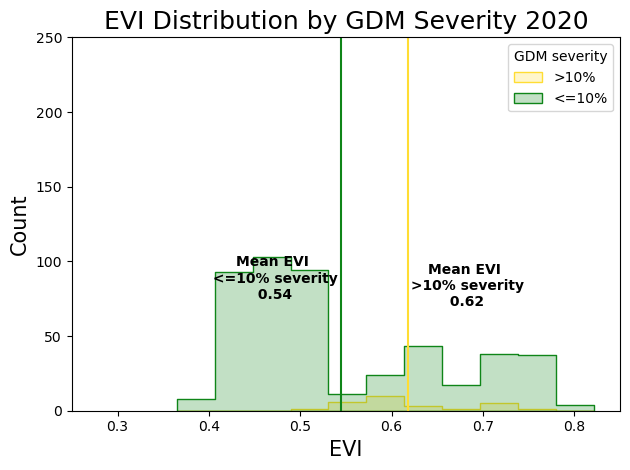

In [26]:
# Plot the 2020 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[0], x="evi", hue="GDM_sev", element='step')

plt.xlabel('EVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['GDM_sev']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.68, 70, "Mean EVI\n >10% severity\n 0.62", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['GDM_sev']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.47, 75, "Mean EVI\n <=10% severity\n 0.54", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Severity 2020', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_sev_2020.svg")
plt.show()

In [27]:
mean_evi_high =dfs[1][dfs[1]['GDM_sev']=='high'].evi.mean()
mean_evi_low =dfs[1][dfs[1]['GDM_sev']=='low'].evi.mean()
print('High sev evi:', mean_evi_high)
print('Low sev evi:', mean_evi_low)


High sev evi: 0.40338368036113414
Low sev evi: 0.44599079099261946


In [28]:
mean_evi_high_22 =dfs[2][dfs[2]['GDM_sev']=='high'].evi.mean()
mean_evi_low_22 =dfs[2][dfs[2]['GDM_sev']=='low'].evi.mean()
print('High sev evi:', mean_evi_high_22)
print('Low sev evi:', mean_evi_low_22)


High sev evi: 0.48093621224731675
Low sev evi: 0.44241567741095117


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2264/2122321739.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


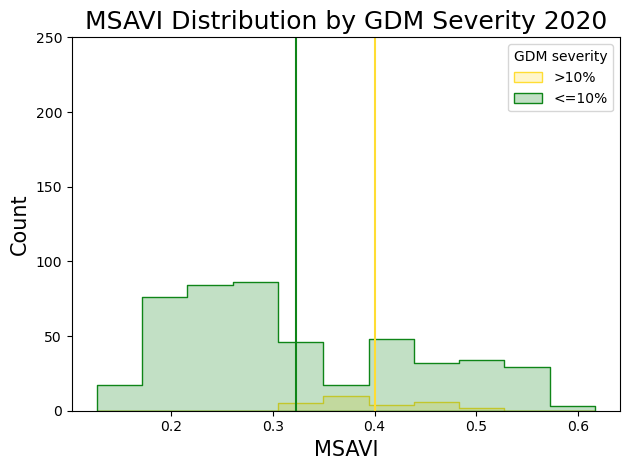

In [31]:
# Plot the 2020 MSAI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[0], x="msavi", hue="GDM_sev", element='step')

plt.xlabel('MSAVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
# plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['GDM_sev']=='high'].msavi.mean(),
            color="#FFDD33")
# plt.text(0.68, 70, "Mean EVI\n >10% severity\n 0.62", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['GDM_sev']=='low'].msavi.mean(),
            color="#0F8518")

# plt.text(0.47, 75, "Mean EVI\n <=10% severity\n 0.54", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('MSAVI Distribution by GDM Severity 2020', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_sev_2020.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2264/1198516188.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


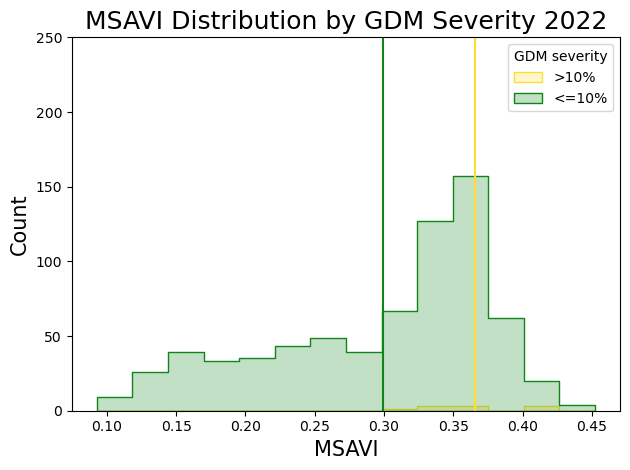

In [32]:
# Plot the 2022 MSAI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[2], x="msavi", hue="GDM_sev", element='step')

plt.xlabel('MSAVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
# plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['GDM_sev']=='high'].msavi.mean(),
            color="#FFDD33")
# plt.text(0.68, 70, "Mean EVI\n >10% severity\n 0.62", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['GDM_sev']=='low'].msavi.mean(),
            color="#0F8518")

# plt.text(0.47, 75, "Mean EVI\n <=10% severity\n 0.54", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('MSAVI Distribution by GDM Severity 2022', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_sev_2020.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_16654/75484535.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


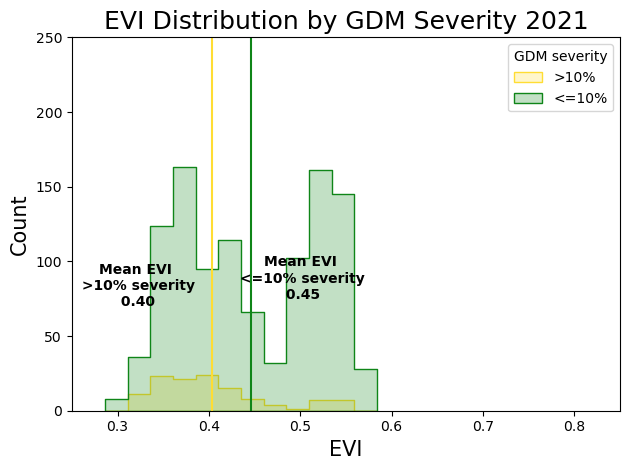

In [71]:
# Plot the 2021 EVI distribution severity

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[1], x="evi", hue="GDM_sev", element='step')

plt.xlabel('EVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[1][dfs[1]['GDM_sev']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.32, 70, "Mean EVI\n >10% severity\n 0.40", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[1][dfs[1]['GDM_sev']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.5, 75, "Mean EVI\n <=10% severity\n 0.45", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Severity 2021', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_sev_2021.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_16654/1242728383.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 160,20)


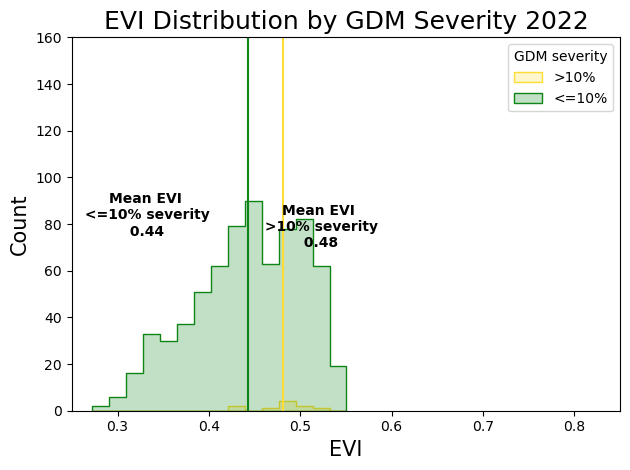

In [72]:
# Plot the 2022 EVI distribution severity

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[2], x="evi", hue="GDM_sev", element='step')

plt.xlabel('EVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 160,20)
plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['GDM_sev']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.52, 70, "Mean EVI\n >10% severity\n 0.48", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['GDM_sev']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.33, 75, "Mean EVI\n <=10% severity\n 0.44", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Severity 2022', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_sev_2022.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_16654/2470571965.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


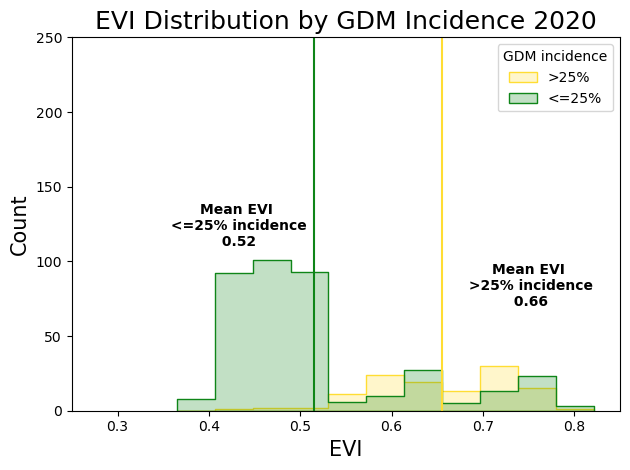

In [73]:
# Plot the 2020 EVI distribution by incidence

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[0], x="evi", hue="GDM_inc", element='step')

plt.xlabel('EVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['GDM_inc']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.75, 70, "Mean EVI\n >25% incidence\n 0.66", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['GDM_inc']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.43, 110, "Mean EVI\n <=25% incidence\n 0.52", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2020', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_inc_2020.svg")
plt.show()

In [25]:
# Try with just 2021
dist_low_21 = dfs[1][dfs[1]['disease_class']=='low']['evi']
len(dist_low_21)
dist_high_21 = dfs[1][dfs[1]['disease_class']=='high']['evi']
len(dist_high_21)

print(mann_whitney_u_test(dist_low_21, dist_high_21))

print("Low disease EVI (mean) 2021:", dist_low_21.mean())
print("High disease EVI (mean) 2021:", dist_high_21.mean())

# SAVI
savi_low_21 = dfs[1][dfs[1]['disease_class']=='low']['savi']
savi_high_21 = dfs[1][dfs[1]['disease_class']=='high']['savi']


print(mann_whitney_u_test(savi_low_21, savi_high_21))
print("Low disease SAVI (mean):", savi_low_21.mean())
print("High disease SAVI (mean):", savi_high_21.mean())

# ARVI
arvi_low_21 = dfs[1][dfs[1]['disease_class']=='low']['arvi']
arvi_high_21 = dfs[1][dfs[1]['disease_class']=='high']['arvi']


print(mann_whitney_u_test(arvi_low_21, arvi_high_21))
print("Low disease ARVI (mean):", arvi_low_21.mean())
print("High disease ARVI (mean):", arvi_high_21.mean())

# GRI
gri_low_21 = dfs[1][dfs[1]['disease_class']=='low']['gri']
gri_high_21 = dfs[1][dfs[1]['disease_class']=='high']['gri']


print(mann_whitney_u_test(gri_low_21, gri_high_21))
print("Low disease GRI (mean):", gri_low_21.mean())
print("High disease GRI (mean):", gri_high_21.mean())

Mann-Whitney U: 256929.0 p-value: 2.0973978138453817e-66
None
Low disease EVI (mean) 2021: 0.4687804493201137
High disease EVI (mean) 2021: 0.3890013186333973
Mann-Whitney U: 251965.0 p-value: 5.648082127314489e-60
None
Low disease SAVI (mean): 0.45174454201983405
High disease SAVI (mean): 0.4059004724153702
Mann-Whitney U: 215342.0 p-value: 7.222269013829611e-23
None
Low disease ARVI (mean): 0.6615290220234684
High disease ARVI (mean): 0.623844283752368
Mann-Whitney U: 260949.0 p-value: 7.394017276013121e-72
None
Low disease GRI (mean): 1.462277428088084
High disease GRI (mean): 1.2329926873002341


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_16654/199839732.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


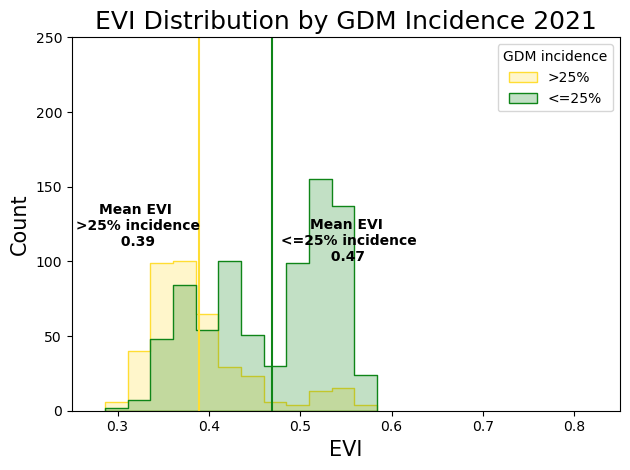

In [74]:
# Plot the 2021 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[1], x="evi", hue="GDM_inc", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[1][dfs[1]['GDM_inc']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.32, 110, "Mean EVI\n >25% incidence\n 0.39", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[1][dfs[1]['GDM_inc']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.55, 100, "Mean EVI\n <=25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2021', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_inc_2021.svg")
plt.show()

In [29]:
# Try with just 2022
dist_low_22 = dfs[2][dfs[2]['disease_class']=='low']['evi']
len(dist_low_22)
dist_high_22 = dfs[2][dfs[2]['disease_class']=='high']['evi']
len(dist_high_22)

print(mann_whitney_u_test(dist_low_22, dist_high_22))

print("Low disease EVI (mean) 2022:", dist_low_22.mean())
print("High disease EVI (mean) 2022:", dist_high_22.mean())

# SAVI
savi_low_22 = dfs[2][dfs[2]['disease_class']=='low']['savi']
savi_high_22 = dfs[2][dfs[2]['disease_class']=='high']['savi']


print(mann_whitney_u_test(savi_low_22, savi_high_22))
print("Low disease SAVI (mean):", savi_low_22.mean())
print("High disease SAVI (mean):", savi_high_22.mean())

# ARVI
arvi_low_22 = dfs[2][dfs[2]['disease_class']=='low']['arvi']
arvi_high_22 = dfs[2][dfs[2]['disease_class']=='high']['arvi']


print(mann_whitney_u_test(arvi_low_22, arvi_high_22))
print("Low disease ARVI (mean):", arvi_low_22.mean())
print("High disease ARVI (mean):", arvi_high_22.mean())

# GRI
gri_low_22 = dfs[2][dfs[2]['disease_class']=='low']['gri']
gri_high_22 = dfs[2][dfs[2]['disease_class']=='high']['gri']


print(mann_whitney_u_test(gri_low_22, gri_high_22))
print("Low disease GRI (mean):", gri_low_22.mean())
print("High disease GRI (mean):", gri_high_22.mean())

Mann-Whitney U: 5405.0 p-value: 0.0005140581606930029
None
Low disease EVI (mean) 2022: 0.445100672661919
High disease EVI (mean) 2022: 0.48299929471929626
Mann-Whitney U: 5077.0 p-value: 0.00015165938292209283
None
Low disease SAVI (mean): 0.4301636422752533
High disease SAVI (mean): 0.4717559718639093
Mann-Whitney U: 6294.0 p-value: 0.008805419771008148
None
Low disease ARVI (mean): 0.4831217567648432
High disease ARVI (mean): 0.5294778608877274
Mann-Whitney U: 8117.0 p-value: 0.3850163508133293
None
Low disease GRI (mean): 0.9397478231834608
High disease GRI (mean): 0.9480908898409834


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_16654/1164217334.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 250,20)


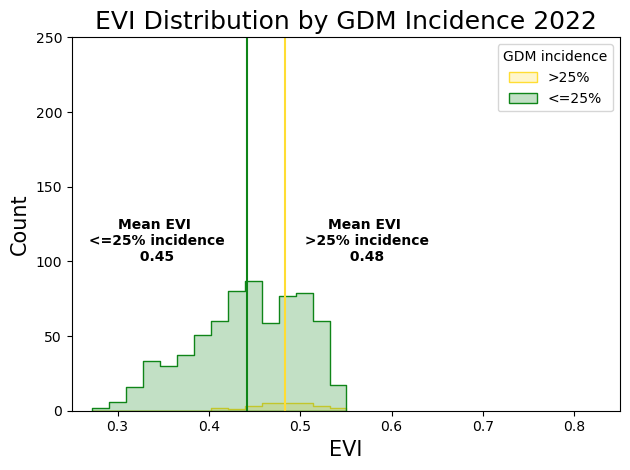

In [75]:
# Plot the 2022 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[2], x="evi", hue="GDM_inc", element='step')

plt.xlabel('EVI', fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 250,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['GDM_inc']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.57, 100, "Mean EVI\n >25% incidence\n 0.48", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['GDM_inc']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.34, 100, "Mean EVI\n <=25% incidence\n 0.45", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2022', fontsize=18)
plt.tight_layout()
# plt.savefig("fig2_inc_2022.svg")
plt.show()

In [24]:
# Try limiting dataset to JUST DM block

just_DM = master_df[master_df['Block']=='DM']
just_DM_20 = dfs[0][dfs[0]['Block']=='DM']
just_DM_21 = dfs[1][dfs[1]['Block']=='DM']

In [25]:
just_DM_20.Block.unique()

array(['DM'], dtype=object)

In [26]:
# Test for sig. diff in EVI for 2020

dm_low_20 = just_DM_20[just_DM_20['disease_class']=='low']['evi']
len(dm_low_20)
dm_high_20 = just_DM_20[just_DM_20['disease_class']=='high']['evi']
len(dm_high_20)

print(mann_whitney_u_test(dm_low_20, dm_high_20))
print("Low disease EVI (mean):", dm_low_20.mean())
print("High disease EVI (mean):", dm_high_20.mean())

Mann-Whitney U: 247.0 p-value: 0.08833241964717731
None
Low disease EVI (mean): 0.5560916113243539
High disease EVI (mean): 0.664622585755704


In [27]:
# For 2021

dm_low_21 = just_DM_21[just_DM_21['disease_class']=='low']['evi']
len(dm_low_21)
dm_high_21 = just_DM_21[just_DM_21['disease_class']=='high']['evi']
len(dm_high_21)

print(mann_whitney_u_test(dm_low_21, dm_high_21))
print("Low disease EVI (mean):", dm_low_21.mean())
print("High disease EVI (mean):", dm_high_21.mean())

Mann-Whitney U: 24396.0 p-value: 3.8280110533687407e-13
None
Low disease EVI (mean): 0.46048877360592066
High disease EVI (mean): 0.4026880372836026


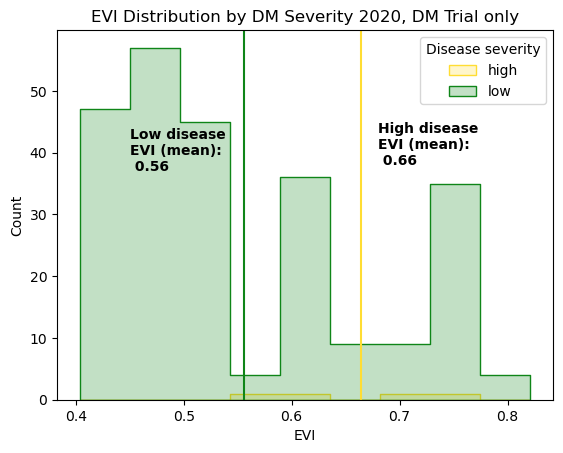

In [28]:
# DM trial only, 2020
# Plot the 2020 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_20, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_20[just_DM_20['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.68, 38, "High disease \nEVI (mean):\n 0.66", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_20[just_DM_20['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.45, 37, "Low disease \nEVI (mean):\n 0.56", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2020, DM Trial only')
#plt.savefig("evi_hist_2020_DM.png")
plt.show()

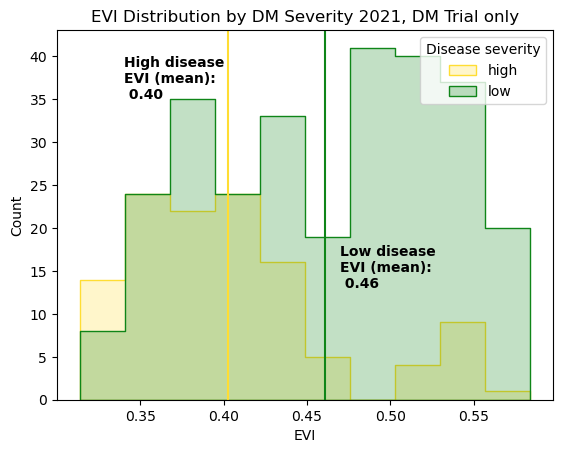

In [29]:
# DM trial only, 2021
# Plot the 2021 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_21, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_21[just_DM_21['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 35, "High disease \nEVI (mean):\n 0.40", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_21[just_DM_21['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.47, 13, "Low disease \nEVI (mean):\n 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2021, DM Trial only')
#plt.savefig("evi_hist_2021_DM.png")
plt.show()

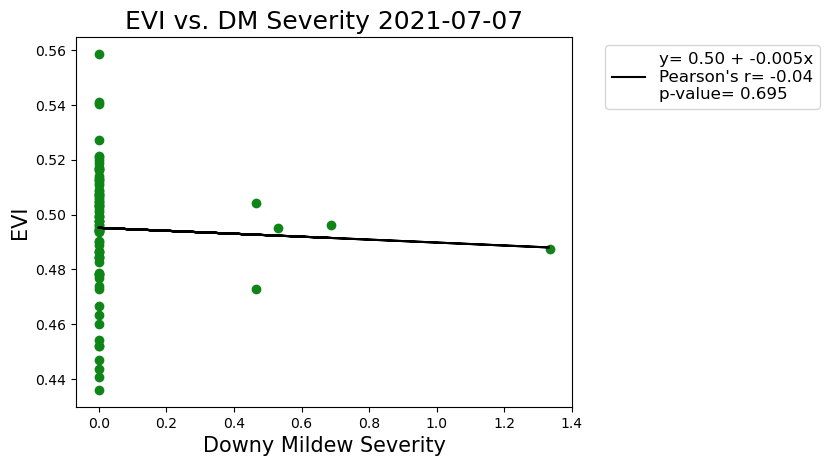

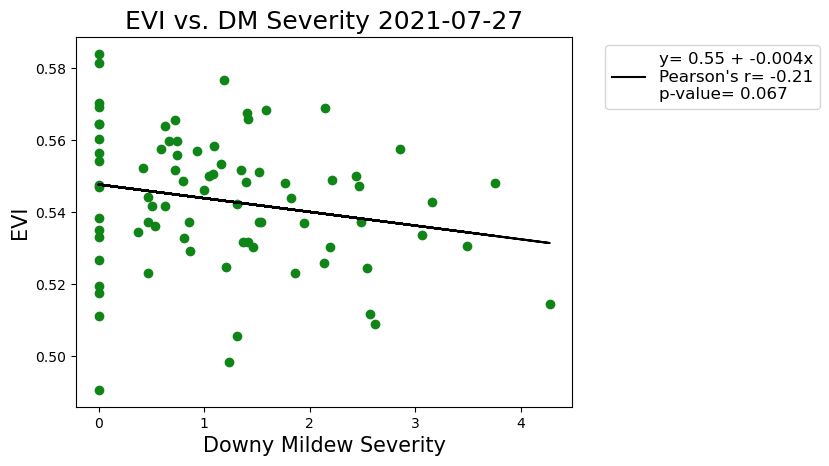

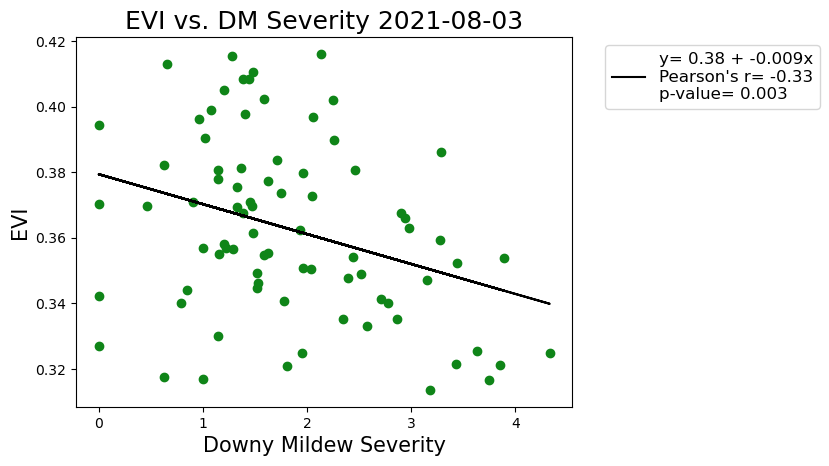

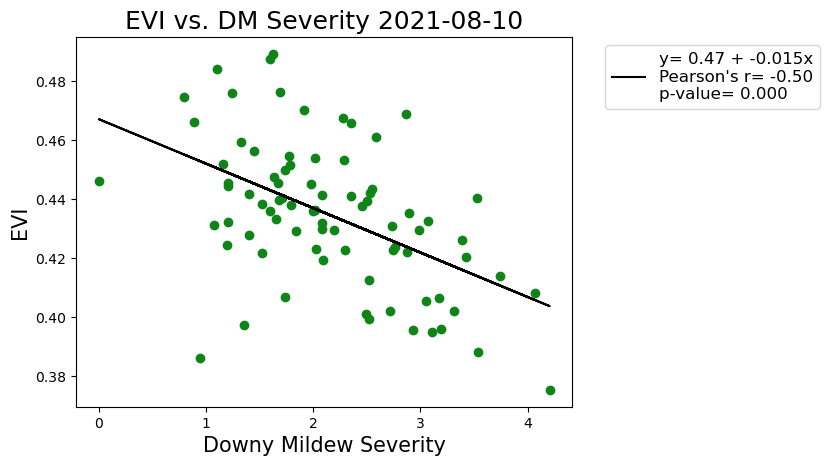

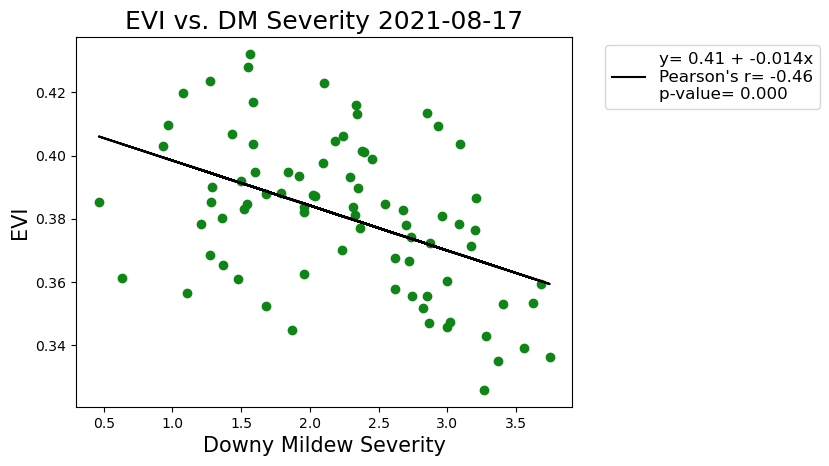

In [30]:
# Daily scatter plots 2021

dates_2021 = just_DM_21.Date.unique()

daily_data = []

for d in dates_2021:
    daily = just_DM_21[just_DM_21['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("EVI", fontsize = 15)
    ax.set_title(f"EVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

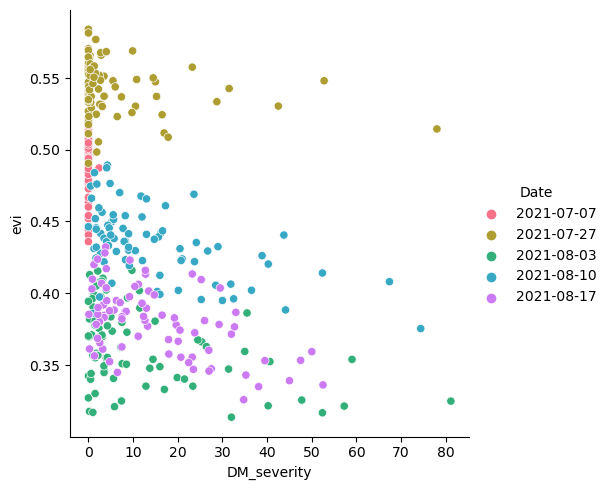

In [31]:
sns.relplot(data=just_DM_21, x="DM_severity", y="evi", hue="Date")

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1115/1022224775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_DM_21['DM_sev_cbrt'] = np.cbrt(just_DM_21['DM_severity'])


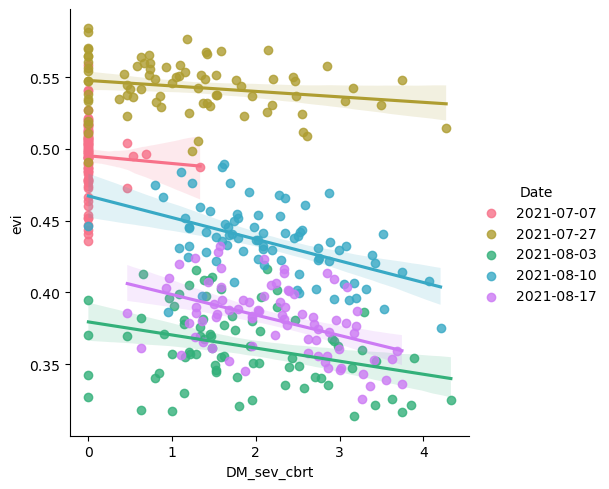

In [32]:
just_DM_21['DM_sev_cbrt'] = np.cbrt(just_DM_21['DM_severity'])
sns.lmplot(x='DM_sev_cbrt', y="evi", hue="Date", data=just_DM_21)

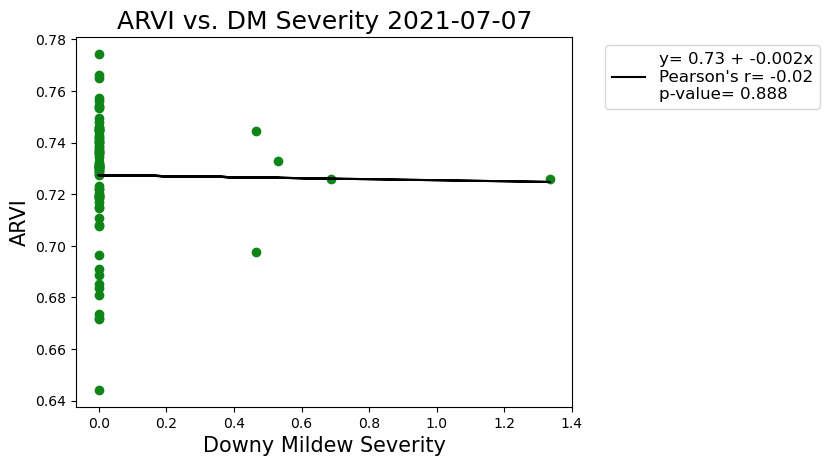

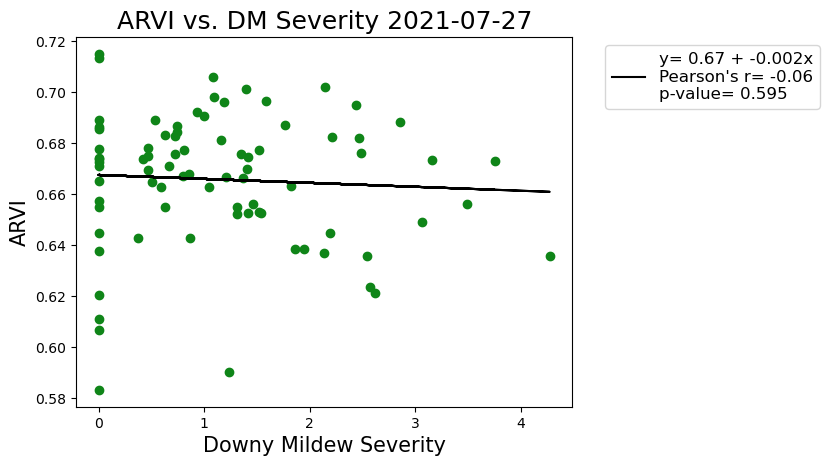

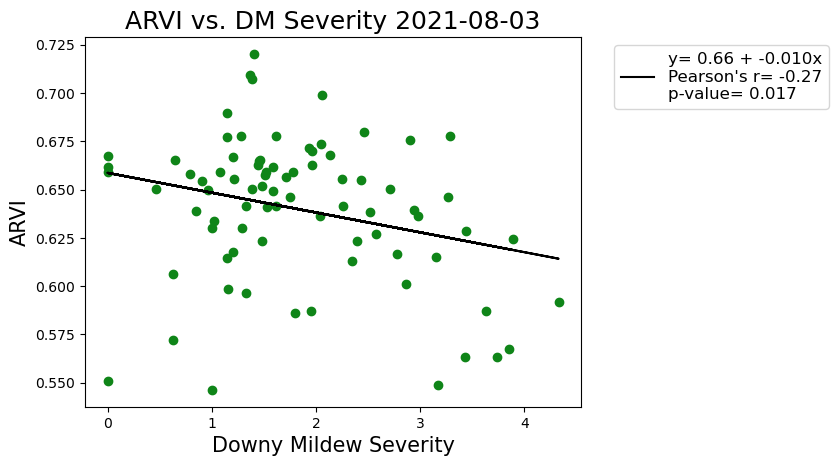

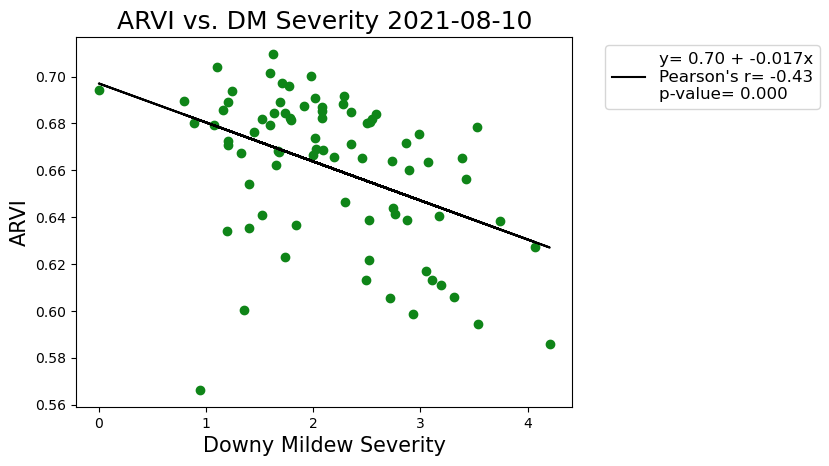

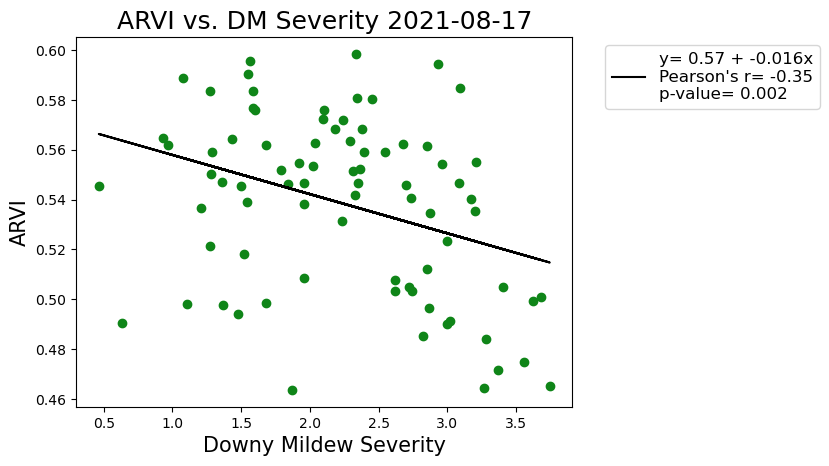

In [33]:
# Daily scatter plots 2021

dates_2021 = just_DM_21.Date.unique()

daily_data = []

for d in dates_2021:
    daily = just_DM_21[just_DM_21['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("ARVI", fontsize = 15)
    ax.set_title(f"ARVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()